In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Load both CSV files
movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')

# Merge on the movie ID
movies = movies.merge(credits, left_on='id', right_on='movie_id')


/var/folders/l8/r5sxc64j2j7gwhzdh6t035sr0000gn/T/ipykernel_33165/2537651566.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')


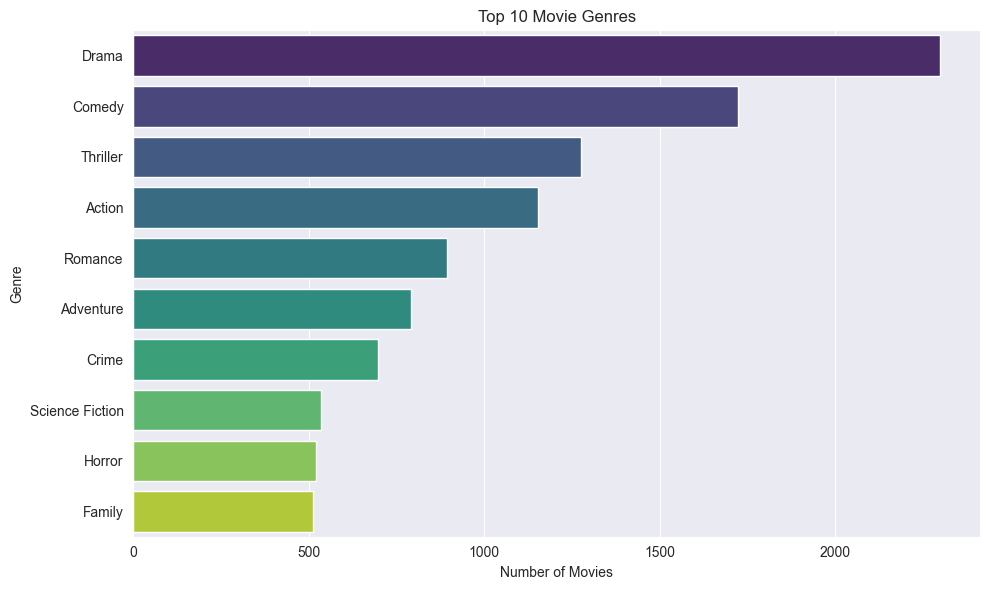

In [4]:
# Convert 'genres' from string to list
def extract_genres(genre_str):
    try:
        genres = ast.literal_eval(genre_str)
        return [genre['name'] for genre in genres]
    except:
        return []

movies['genre_list'] = movies['genres'].apply(extract_genres)

# Explode the genre list to count each genre
genre_counts = movies.explode('genre_list')['genre_list'].value_counts().head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title('Top 10 Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()



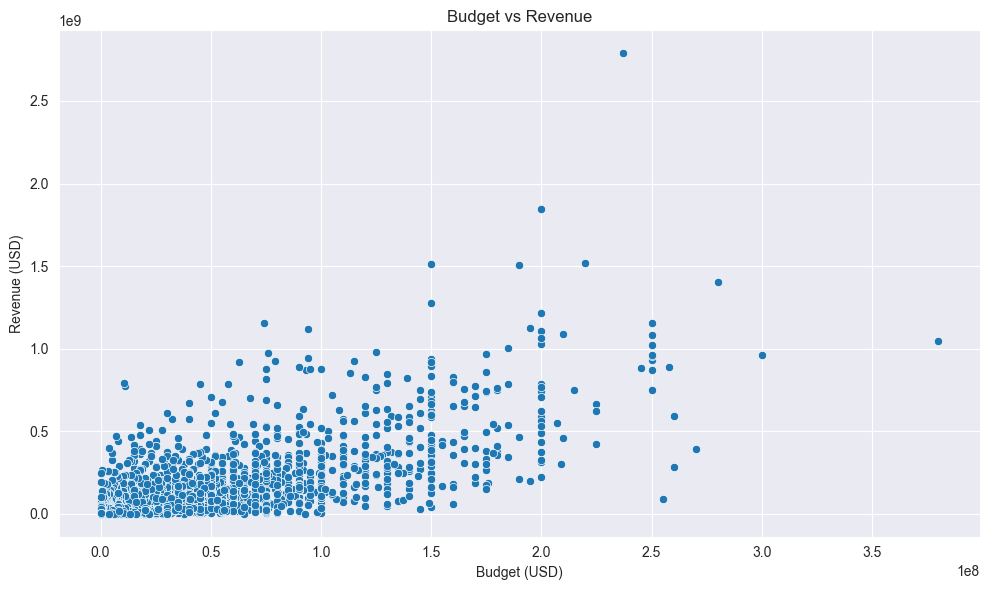

In [5]:
# Filter out rows with zero or missing values
df = movies[(movies['budget'] > 0) & (movies['revenue'] > 0)]

plt.figure(figsize=(10,6))
sns.scatterplot(x='budget', y='revenue', data=df)
plt.title('Budget vs Revenue')
plt.xlabel('Budget (USD)')
plt.ylabel('Revenue (USD)')
plt.tight_layout()
plt.show()


In [8]:


# Sort the DataFrame to get top 10 movies by vote count
top_voted = movies.sort_values(by='vote_count', ascending=False).head(10)

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a horizontal barplot using seaborn
sns.barplot(
    x='vote_count',
    y='title',
    data=top_voted,
    palette='coolwarm'
)

# Add titles and labels
plt.title('Top 10 Most Voted Movies')
plt.xlabel('Vote Count')
plt.ylabel('Movie Title')

# Automatically adjust subplot params for better fit
plt.tight_layout()

# Show the plot
plt.show()


ValueError: Could not interpret value `title` for `y`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

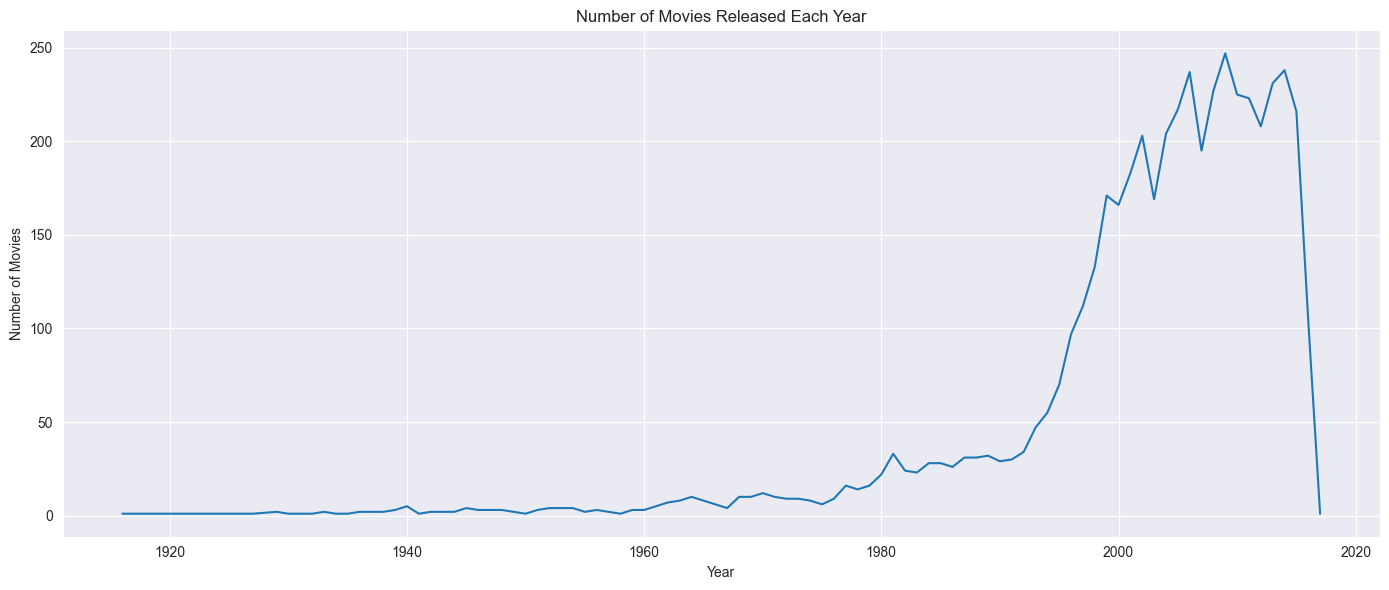

In [9]:
# Extract year from release_date
movies['release_year'] = pd.to_datetime(movies['release_date'], errors='coerce').dt.year

yearly_count = movies['release_year'].value_counts().sort_index()

plt.figure(figsize=(14,6))
sns.lineplot(x=yearly_count.index, y=yearly_count.values)
plt.title('Number of Movies Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.show()


/var/folders/l8/r5sxc64j2j7gwhzdh6t035sr0000gn/T/ipykernel_33165/226161558.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_avg_rating.values, y=genre_avg_rating.index, palette='magma')


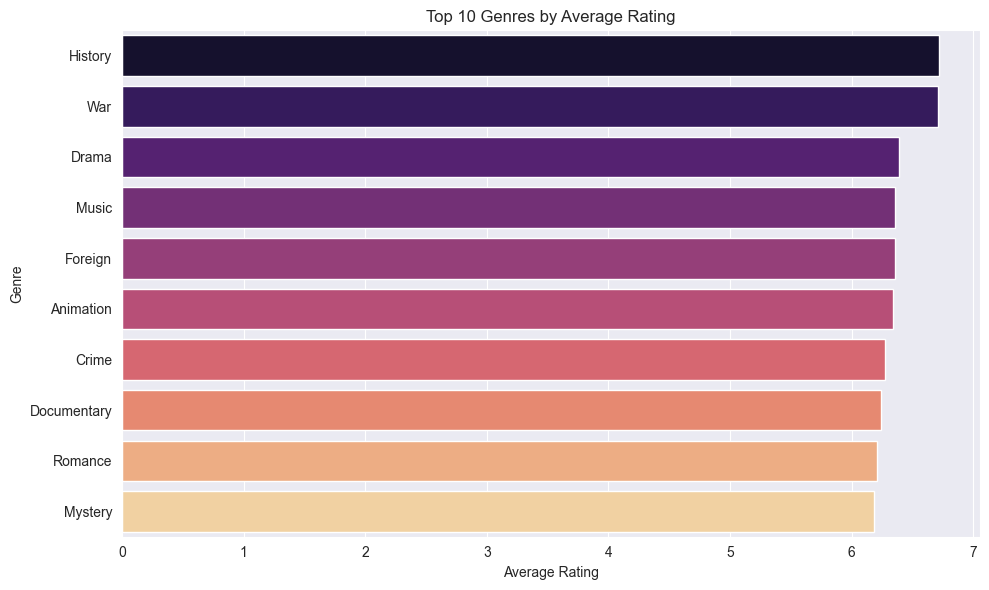

In [10]:
# Explode for genre-wise rating analysis
genre_rating = movies.explode('genre_list')
genre_avg_rating = genre_rating.groupby('genre_list')['vote_average'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=genre_avg_rating.values, y=genre_avg_rating.index, palette='magma')
plt.title('Top 10 Genres by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()


Models


In [18]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Use your 'movies' DataFrame (assuming it's already loaded)
df_movies = movies.copy()

# Fill missing overviews with empty string
df_movies['overview'] = df_movies['overview'].fillna("")

# Create the TF-IDF matrix from the 'overview' text
tfidf = TfidfVectorizer(stop_words="english")
tfidf_matrix = tfidf.fit_transform(df_movies['overview'])

# Compute cosine similarity
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Extract the top 10 most similar movie pairs (excluding self-matches)
similar_pairs = []
for i in range(len(df_movies)):
    for j in range(i + 1, len(df_movies)):
        similar_pairs.append((i, j, cosine_sim[i][j]))

# Convert to DataFrame
similar_df = pd.DataFrame(similar_pairs, columns=["movie_1", "movie_2", "similarity"])

# Get top 10 most similar pairs
top_similar = similar_df.sort_values(by="similarity", ascending=False).head(10)

# Add movie titles
top_similar["movie_1_title"] = top_similar["movie_1"].apply(lambda x: df_movies.iloc[x]["title"])
top_similar["movie_2_title"] = top_similar["movie_2"].apply(lambda x: df_movies.iloc[x]["title"])

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    y=top_similar["movie_1_title"] + " ↔ " + top_similar["movie_2_title"],
    x=top_similar["similarity"],
    palette="viridis"
)
plt.title("Top 10 Most Similar Movie Pairs (TF-IDF)")
plt.xlabel("Cosine Similarity")
plt.ylabel("Movie Pairs")
plt.tight_layout()
plt.show()


AttributeError: module 'numpy' has no attribute '_no_nep50_warning'

In [19]:
plt.figure(figsize=(10,5))
sns.histplot(similar_df['similarity'], bins=50, kde=True, color='teal')
plt.title("Distribution of Movie Similarity Scores")
plt.xlabel("Cosine Similarity")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


NameError: name 'similar_df' is not defined

<Figure size 1000x500 with 0 Axes>